# Task 10
## Subtask 1: an explanation of the difference between cupu and numpy. How does cupy handle data transfers  between cpu and gpu?

In [14]:
import cupy as cp

ModuleNotFoundError: No module named 'cupy'

In [13]:
import cupy as cp
import numpy as np

In [16]:
cp.cuda.Device()

<CUDA Device 0>

CuPy has a concept of the current device, which is the default device on which the allocation, manipulation, calculation etc. of arrays are taken place. 

CuPy -GPU, Numpy - CPU

cupy.asarray() can be used to move a numpy.ndarray, a list, or any object that can be passed to numpy.array() to the current device (GPU).

In [14]:
x_cpu = np.array([1, 2, 3])
x_gpu = cp.asarray(x_cpu)  # move the data to the current device.

Moving a device array to the host can be done by cupy.asnumpy():

In [15]:
x_gpu = cp.array([1, 2, 3])  # create an array in the current device
x_cpu = cp.asnumpy(x_gpu)  # move the array to the host.

We can also use cupy.ndarray.get():

In [11]:
x_cpu = x_gpu.get()

## Subtask 2: Function saxpy that runs on GPU using cupu is provied

In [2]:
import cupy as cp
import numpy as np

def np_saxpy(x, y, a):
    return x*a + y

@cp.fuse()
def cp_saxpy(x, y, a):
    return x*a + y

## Subtask 3: Graph - computation time vs size of arrays (for numpy and cupy)

In [40]:
np_results = []
for size in np.logspace(1, 4, 20):
    size = int(size)
    np_x = np.random.rand(size, size).astype(np.float32)
    np_y = np.random.rand(size, size).astype(np.float32)
    np_a = np.float32(5.0)
    t = %timeit -o -q np_saxpy(np_x, np_y, np_a);
    np_results.append(t)

In [41]:
np_results

[<TimeitResult : 1.5 µs ± 36.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)>,
 <TimeitResult : 1.53 µs ± 14.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)>,
 <TimeitResult : 1.78 µs ± 56.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)>,
 <TimeitResult : 2.05 µs ± 43.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)>,
 <TimeitResult : 2.39 µs ± 6.28 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)>,
 <TimeitResult : 3.17 µs ± 9.12 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)>,
 <TimeitResult : 4.61 µs ± 81.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)>,
 <TimeitResult : 8 µs ± 113 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)>,
 <TimeitResult : 15.6 µs ± 287 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)>,
 <TimeitResult : 30.9 µs ± 65 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)>,
 <TimeitResult : 62.3 µs ± 3.27 µs per loop (mean ± std. dev. of 

In [42]:
cp_results = []
for size in cp.logspace(1, 4, 20):
    size = int(size)
    cp_x = cp.random.rand(size, size).astype(cp.float32)
    cp_y = cp.random.rand(size, size).astype(cp.float32)
    cp_a = cp.float32(2.0)
    t = %timeit -o -q np_saxpy(cp_x, cp_y, cp_a);
    cp_results.append(t)

In [43]:
cp_results

[<TimeitResult : 22.6 µs ± 1.23 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)>,
 <TimeitResult : 24.1 µs ± 1.86 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)>,
 <TimeitResult : 22.2 µs ± 89.1 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)>,
 <TimeitResult : 22.1 µs ± 250 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)>,
 <TimeitResult : 22.2 µs ± 706 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)>,
 <TimeitResult : 21.7 µs ± 239 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)>,
 <TimeitResult : 21.8 µs ± 522 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)>,
 <TimeitResult : 21.8 µs ± 143 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)>,
 <TimeitResult : 21.9 µs ± 379 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)>,
 <TimeitResult : 21.8 µs ± 52.1 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)>,
 <TimeitResult : 30.8 µs ± 725 ns per loop (mean ± std. dev. of 7 runs, 1000

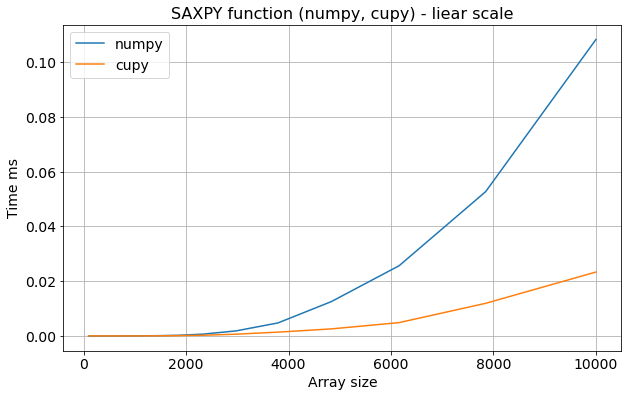

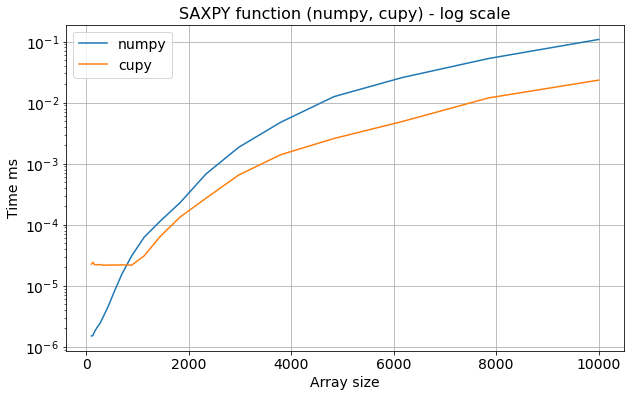

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(np.logspace(2, 4, 20), [i.average for i in np_results])
plt.plot(np.logspace(2, 4, 20), [i.average for i in cp_results])
plt.title('SAXPY function (numpy, cupy) - liear scale', fontsize=16)
#plt.yscale('log')
plt.xlabel('Array size', fontsize=14)
plt.ylabel('Time ms', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['numpy', 'cupy'], fontsize=14);
plt.grid()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(np.logspace(2, 4, 20), [i.average for i in np_results])
plt.plot(np.logspace(2, 4, 20), [i.average for i in cp_results])
plt.title('SAXPY function (numpy, cupy) - log scale', fontsize=16)
plt.yscale('log')
plt.xlabel('Array size', fontsize=14)
plt.ylabel('Time ms', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['numpy', 'cupy'], fontsize=14);
plt.grid()
plt.show()